In [1]:
# pyface_example.ipynb
# Authors: Stephan Meighen-Berger
# Example script of how to use pyface

In [2]:
# imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys
# package
sys.path.append("../")
from pyface import PyFace, config

In [3]:
# Location where the images should be stored
str_pics = "../pics/"

In [4]:
# initializing
pf = PyFace()

In [5]:
# Running the simulation
pf.simulation(
    energy="1 TeV",
    particle="proton"
)

--------------------------------------------------------------
Generating the mac file. This tells the geant4 scripts
what the simulation should look like
Removing the old mac file
--------------------------------------------------------------
Running (and compiling) the Geant4 scripts
-- Configuring done
-- Generating done
-- Build files have been written to: /home/meighniac/geant4/projects/showers/build
Consolidate compiler generated dependencies of target showers
[100%] Built target showers

**************************************************************
 Geant4 version Name: geant4-10-07-patch-03    (19-November-2021)
                       Copyright : Geant4 Collaboration
                      References : NIM A 506 (2003), 250-303
                                 : IEEE-TNS 53 (2006), 270-278
                                 : NIM A 835 (2016), 186-225
                             WWW : http://geant4.org/
**************************************************************

Using Csv

-

In [6]:
# Loading data
str_build_dir = config["general"]["build directory"]
str_edeposit = 'Shower_h1_Etarget.csv'
str_track = 'Shower_h1_Ltarget.csv'
str_pos = 'Shower_h2_Target_XZ.csv'
str_file_name = str_build_dir + str_edeposit
dataE = pd.read_csv(str_file_name, skiprows=6)
str_file_name = str_build_dir + str_track
dataL = pd.read_csv(str_file_name, skiprows=6)
str_file_name = str_build_dir + str_pos
dataPos = pd.read_csv(str_file_name, skiprows=9)

Text(0, 0.5, '$Counts$')

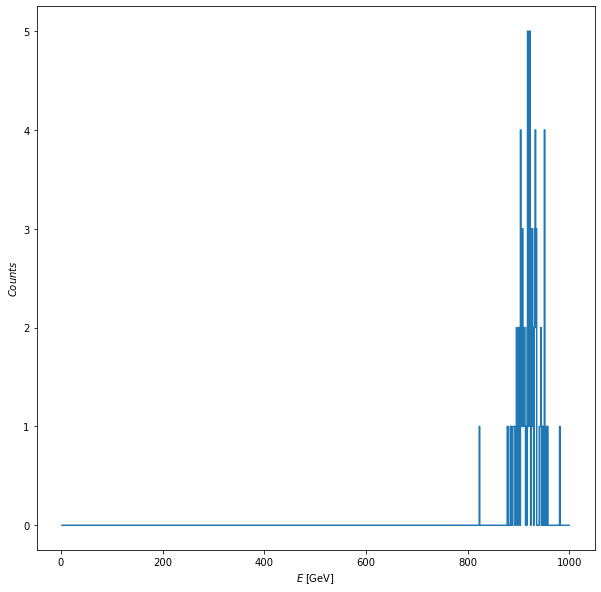

In [7]:
# The deposited energy in the target volume
lowE_cut = 1
underflow_cut = 1
overflow_cut = 1
fig, ax = plt.subplots(figsize=(10, 10))
ax.step(
    np.linspace(1, 1e3, 1000)[lowE_cut:],
    dataE["entries"][(lowE_cut+underflow_cut):(-overflow_cut)]
)
ax.set_xscale("linear")
ax.set_yscale("linear")
fig.patch.set_facecolor("white")
ax.set_facecolor("white")
ax.set_xlabel(r"$E\;\mathrm{[GeV]}$")
ax.set_ylabel(r"$Counts$")

Text(0, 0.5, '$Counts$')

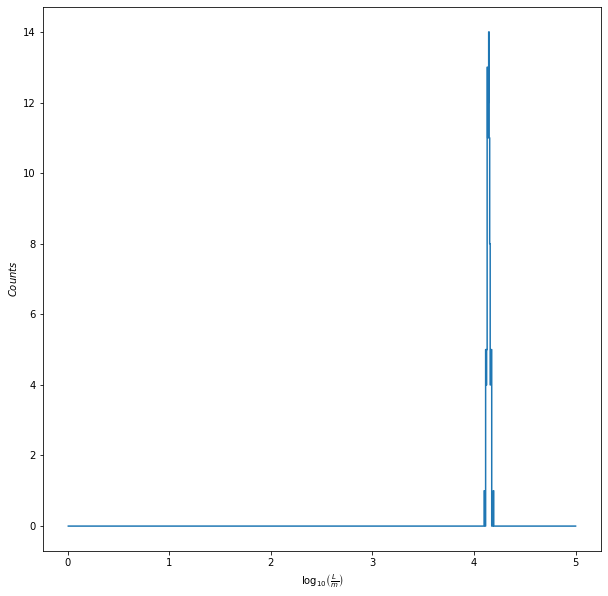

In [8]:
# Total track length of the shower
lowL_cut = 1
underflow_cut = 1
overflow_cut = 1
fig, ax = plt.subplots(figsize=(10, 10))
ax.step(
    np.linspace(0, 5, 1000)[lowL_cut:],
    dataL["entries"][(lowL_cut+underflow_cut):(-overflow_cut)]
)
ax.set_xscale("linear")
ax.set_yscale("linear")
fig.patch.set_facecolor("white")
ax.set_facecolor("white")
ax.set_xlabel(r"$\log_{10}\left(\frac{L}{m}\right)$")
ax.set_ylabel(r"$Counts$")

In [9]:
# Fixing up the positional data
pos_vector = np.array(dataPos["entries"]).reshape((1000 + 2, 1000 + 2))

(-20.0, 0.0)

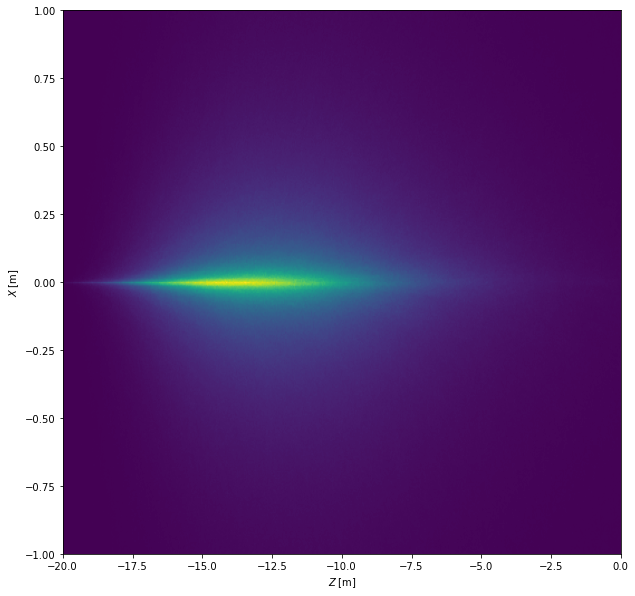

In [10]:
# The particles over all runs
underflow_cut = 1
overflow_cut = 1
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(
    pos_vector[underflow_cut:-overflow_cut, underflow_cut:-overflow_cut].T,
    aspect='auto', extent=(-20, 20, -2.5, 2.5,)
)
ax.autoscale(False)
ax.set_xscale("linear")
ax.set_yscale("linear")
fig.patch.set_facecolor("white")
ax.set_facecolor("white")
ax.set_xlabel(r"$Z\;\mathrm{[m]}$")
ax.set_ylabel(r"$X\;\mathrm{[m]}$")
ax.set_ylim(-1, 1)
ax.set_xlim(-20, 0)

In [11]:
# Constructing the multiplicity projection
multiplicity = np.sum(
    pos_vector[underflow_cut:-overflow_cut, underflow_cut:-overflow_cut].T,
    axis=0)

Text(0, 0.5, '$PDF_N$')

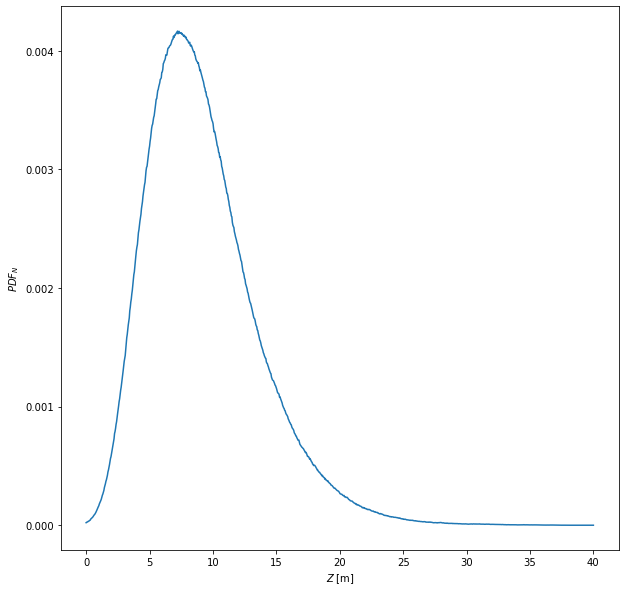

In [12]:
underflow_cut = 1
overflow_cut = 1
fig, ax = plt.subplots(figsize=(10, 10))
ax.plot(
    np.linspace(0., 40., 1000),
    multiplicity / np.sum(multiplicity)
)
ax.set_xscale("linear")
ax.set_yscale("linear")
fig.patch.set_facecolor("white")
ax.set_facecolor("white")
ax.set_xlabel(r"$Z\;\mathrm{[m]}$")
ax.set_ylabel(r"$PDF_N$")